In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [4]:
# Basic checks of the dataset

In [5]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## EDA

In [6]:
data.shape

(1000, 40)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
data.drop(columns = '_c39', axis =1,inplace = True)

In [10]:
data.shape

(1000, 39)

In [11]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
# Now, no null value exists

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [14]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
#droping policy_number, since it had all unique value
data = data.drop(columns = ['policy_number', 'incident_location'], axis =1)

In [16]:
for i in data.columns:
    print(f"{i} = {data[i].nunique()} \n {data[i].value_counts()}\n\n")

months_as_customer = 391 
 194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


age = 46 
 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


policy_bind_date = 951 
 01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


policy_state = 3 
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl = 3 
 250/500     351

In [17]:
# UNivariate

In [18]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

In [19]:
data['incident_date'].dtypes

dtype('<M8[ns]')

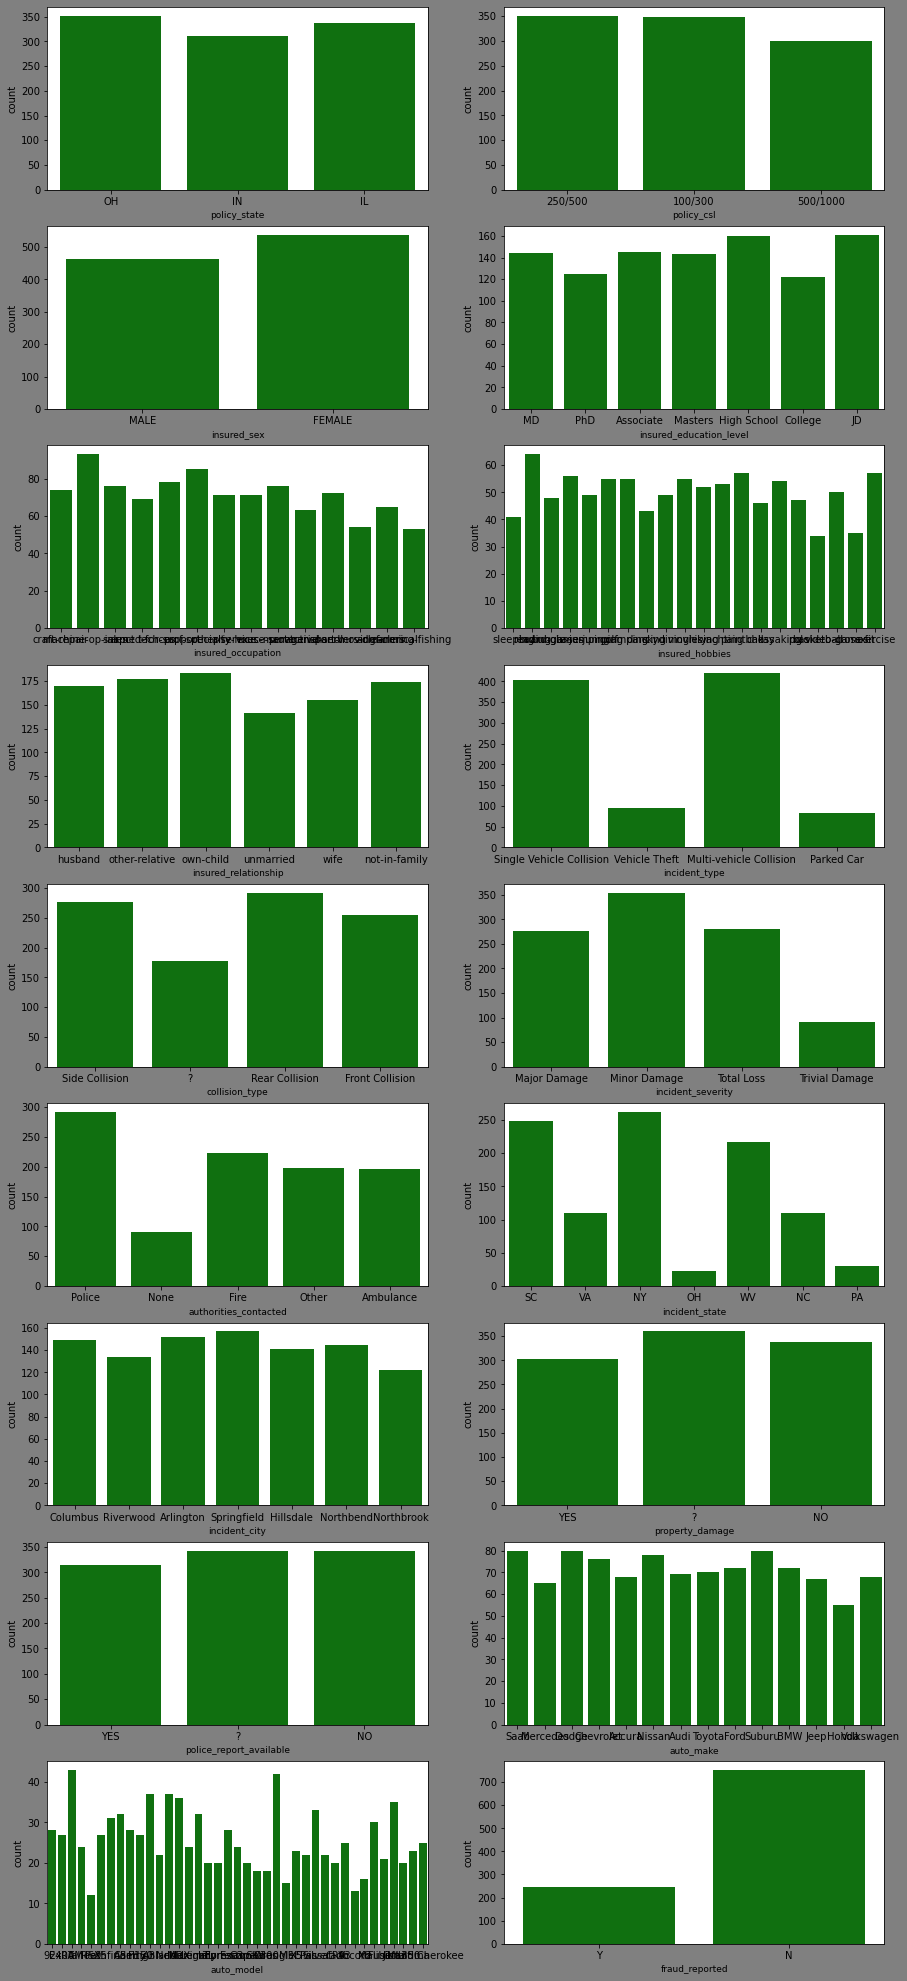

In [20]:
plt.figure(figsize=(15,80),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes == 'object':
        if plotnumber<=39:
            ax=plt.subplot(20,2,plotnumber)
            sns.countplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

In [21]:
data.replace('?','')

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [22]:
data['collision_type'] = data['collision_type'].replace('?',np.nan)
data['property_damage'] = data['property_damage'].replace('?',np.nan)
data['police_report_available'] = data['police_report_available'].replace('?',np.nan)
data['police_report_available'] = data['police_report_available'].replace('?',np.nan)

In [23]:
for i in data.columns:
    print(f"{i} = {data[i].nunique()} \n {data[i].value_counts()}\n\n")

months_as_customer = 391 
 194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


age = 46 
 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


policy_bind_date = 951 
 2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64


policy_state = 3 
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl = 3 
 250/500     351

In [24]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [25]:
from sklearn.preprocessing import OrdinalEncoder
for i in data.columns:
    if data[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[data[i].unique()])
        data[i] = enco.fit_transform(data[[i]])

In [26]:
for i in data.columns:
    print(f"{i} = {data[i].nunique()} \n {data[i].value_counts()}\n\n")

months_as_customer = 391 
 194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


age = 46 
 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


policy_bind_date = 951 
 2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64


policy_state = 3 
 0.0    352
2.0    338
1.0    310
Name: policy_state, dtype: int64


policy_csl = 3 
 0.0    351
1

In [27]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                          float64
policy_csl                            float64
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                           float64
insured_education_level               float64
insured_occupation                    float64
insured_hobbies                       float64
insured_relationship                  float64
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                         float64
collision_type                        float64
incident_severity                     float64
authorities_contacted                 float64
incident_state                    

In [28]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [29]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [30]:
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [31]:
data_cat = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
            'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type',
            'collision_type', 'incident_severity', 'number_of_vehicles_involved','bodily_injuries',
            'witnesses', 'authorities_contacted', 'incident_state',
            'incident_city', 'property_damage', 'police_report_available',
            'auto_make',  'auto_model', 'fraud_reported']
data_con = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
            'umbrella_limit', 'insured_zip',  'capital-gains', 'capital-loss', 
            'incident_hour_of_the_day', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
            'auto_make', 'auto_model', 'auto_year']

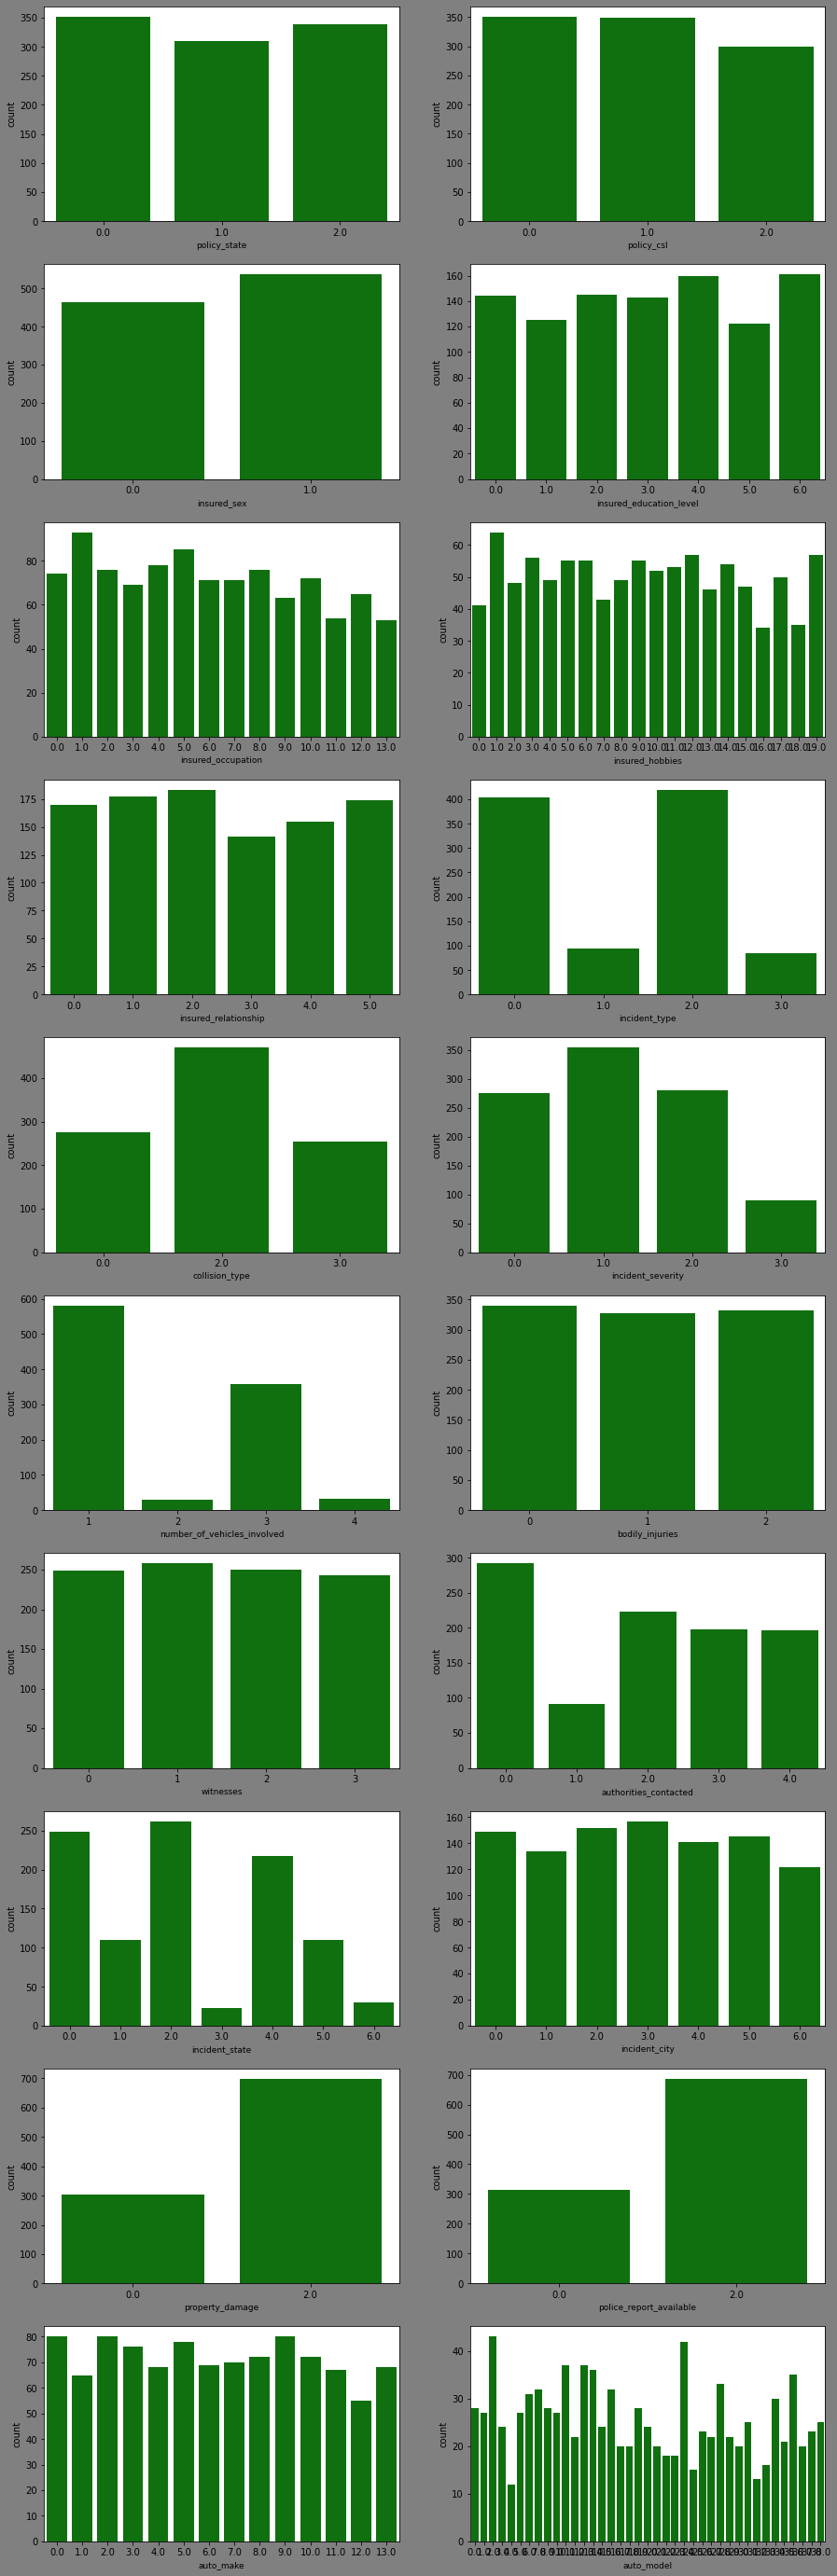

In [32]:
plt.figure(figsize=(15,50),facecolor='grey')
plotnumber = 1


for column in data_cat:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.countplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)

    plotnumber+=1
plt.show()

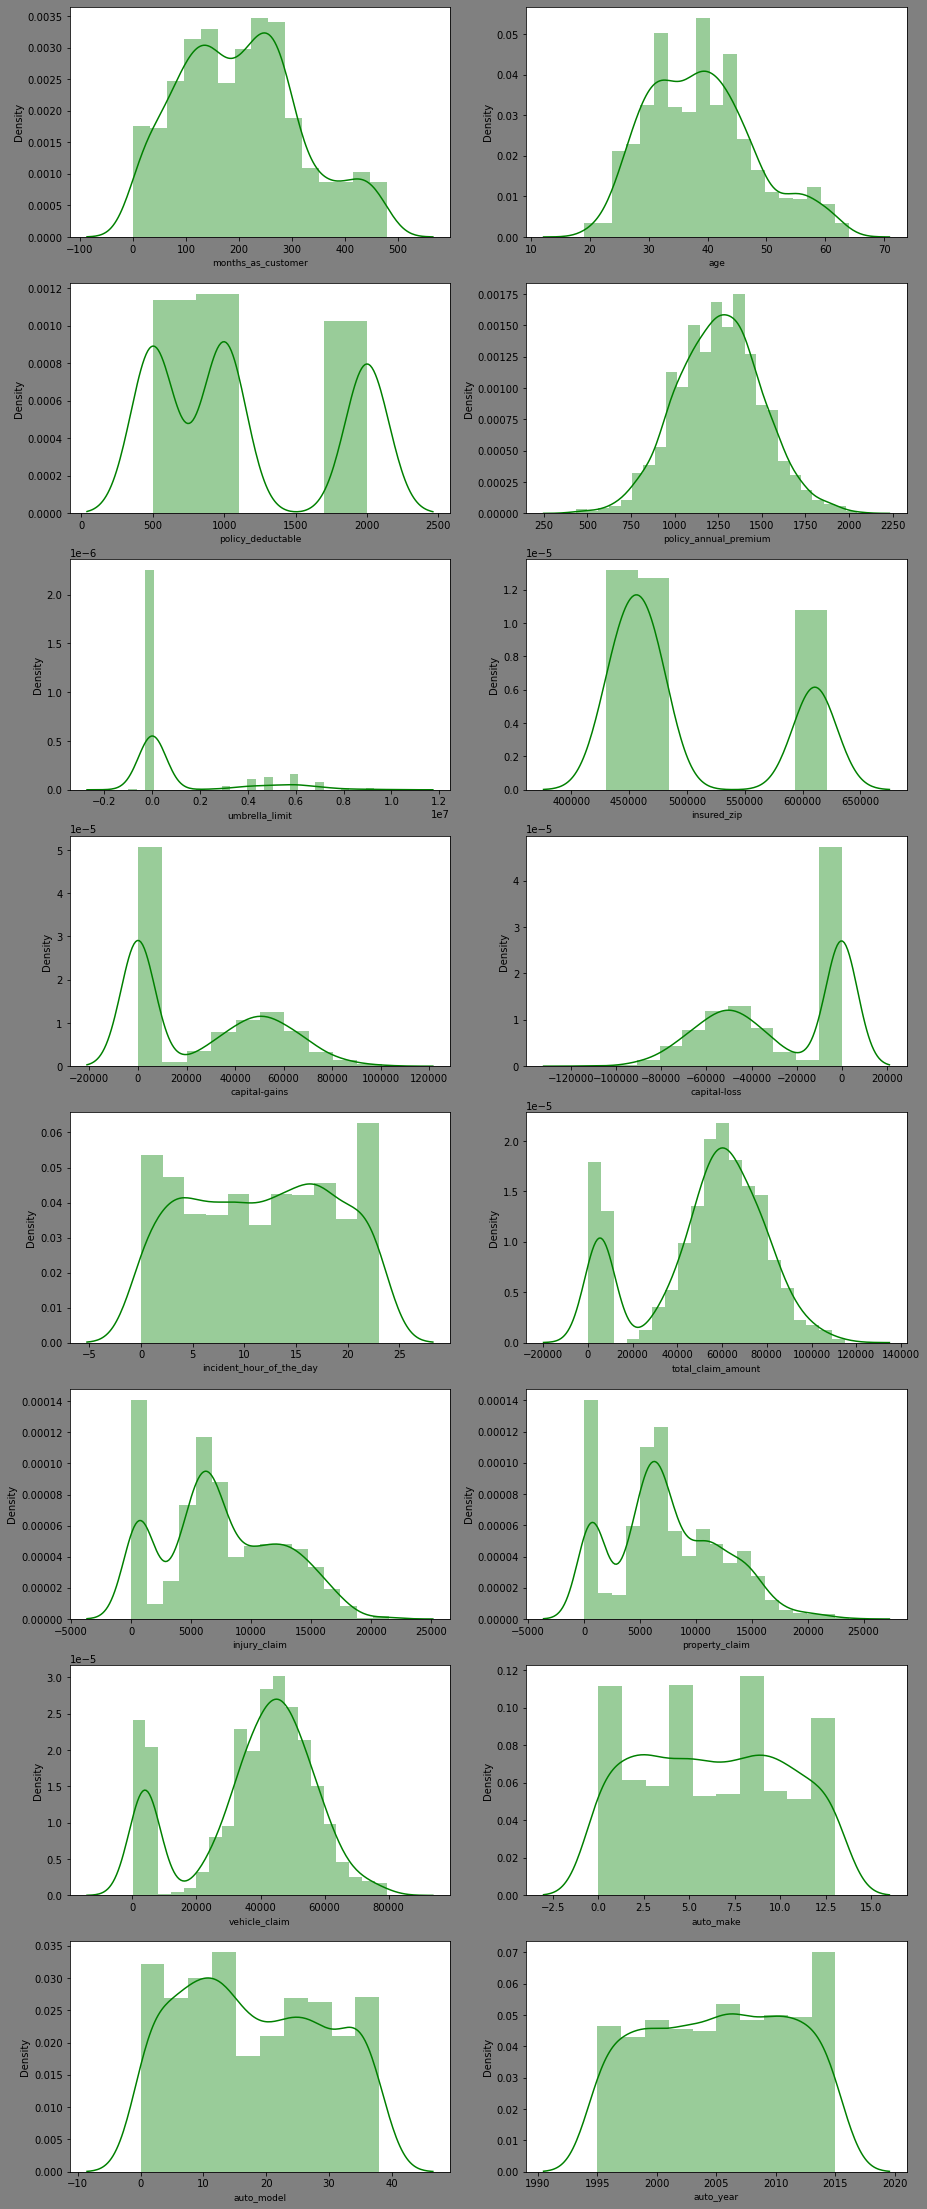

In [33]:
plt.figure(figsize=(15,50),facecolor='grey')
plotnumber = 1


for column in data_con:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)

    plotnumber+=1
plt.show()

In [34]:
# need to treat negative values

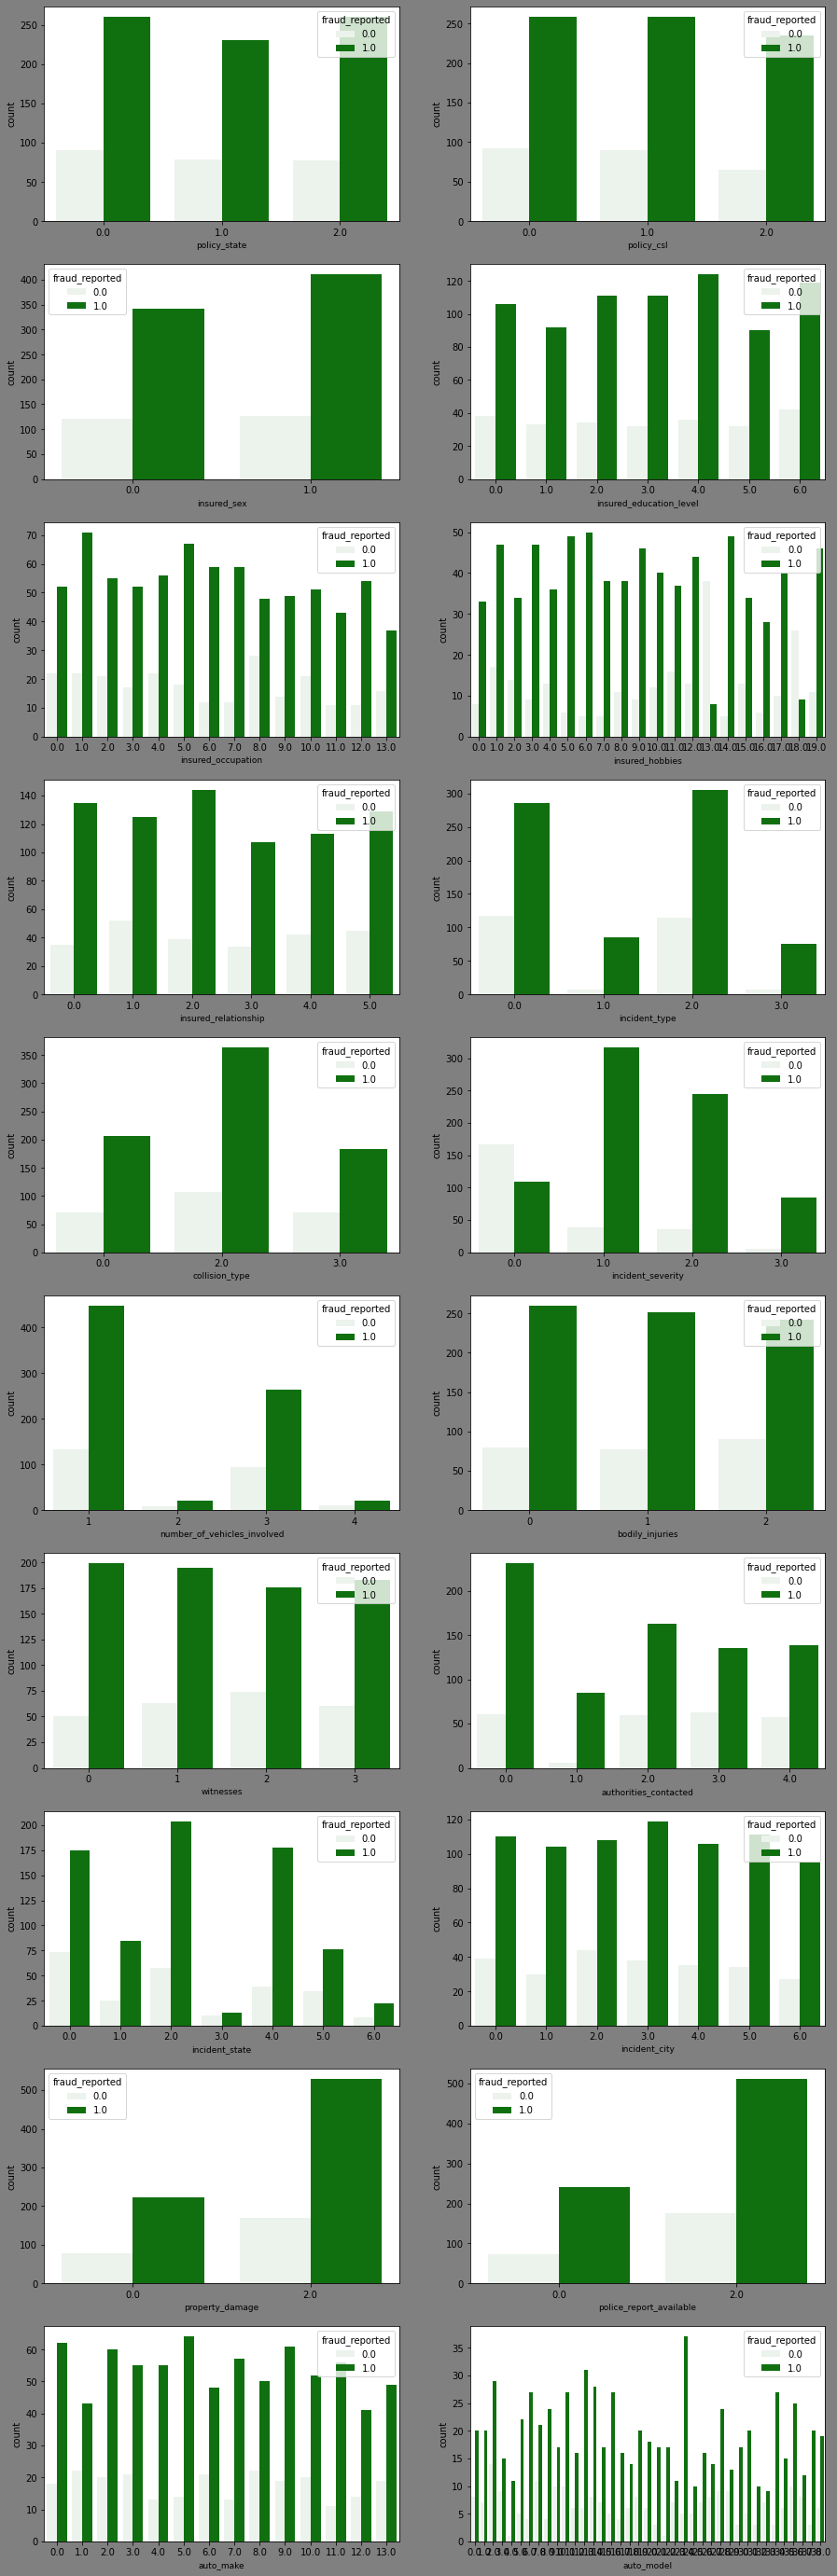

In [35]:
plt.figure(figsize=(15,50),facecolor='grey')
plotnumber = 1


for column in data_cat:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.countplot(data[column], hue = data['fraud_reported'],color = 'green')
        plt.xlabel(column,fontsize=9)

    plotnumber+=1
plt.show()

In [36]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [37]:
data['umbrella_limit'] = data['umbrella_limit'].replace(-1000000,1000000)

In [38]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  1000000,  2000000], dtype=int64)

In [39]:
data['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [40]:
a = data['months_as_customer'].unique()
for i in a:
    if i <= 0:
        print(i)

0


In [41]:
a = data['total_claim_amount'].unique()
for i in a:
    if i <= 0:
        print(i)

In [42]:
a = data['auto_model'].unique()
for i in a:
    if i <= 0:
        print(i)

0.0


In [43]:
a = data['auto_make'].unique()
for i in a:
    if i <= 0:
        print(i)

0.0


In [44]:
a = data['property_claim'].unique()
for i in a:
    if i <= 0:
        print(i)

0


In [45]:
a = data['injury_claim'].unique()
for i in a:
    if i <= 0:
        print(i)

0


In [46]:
a = data['total_claim_amount'].unique()
for i in a:
    if i <= 0:
        print(i)

In [47]:
a = data['capital-gains'].unique()
for i in a:
    if i <= 0:
        print(i)

0


In [48]:
a = data['capital-loss'].unique()
for i in a:
    if i >= 0:
        print(i)

0


In [49]:
# all values are negative. So no need to treat.

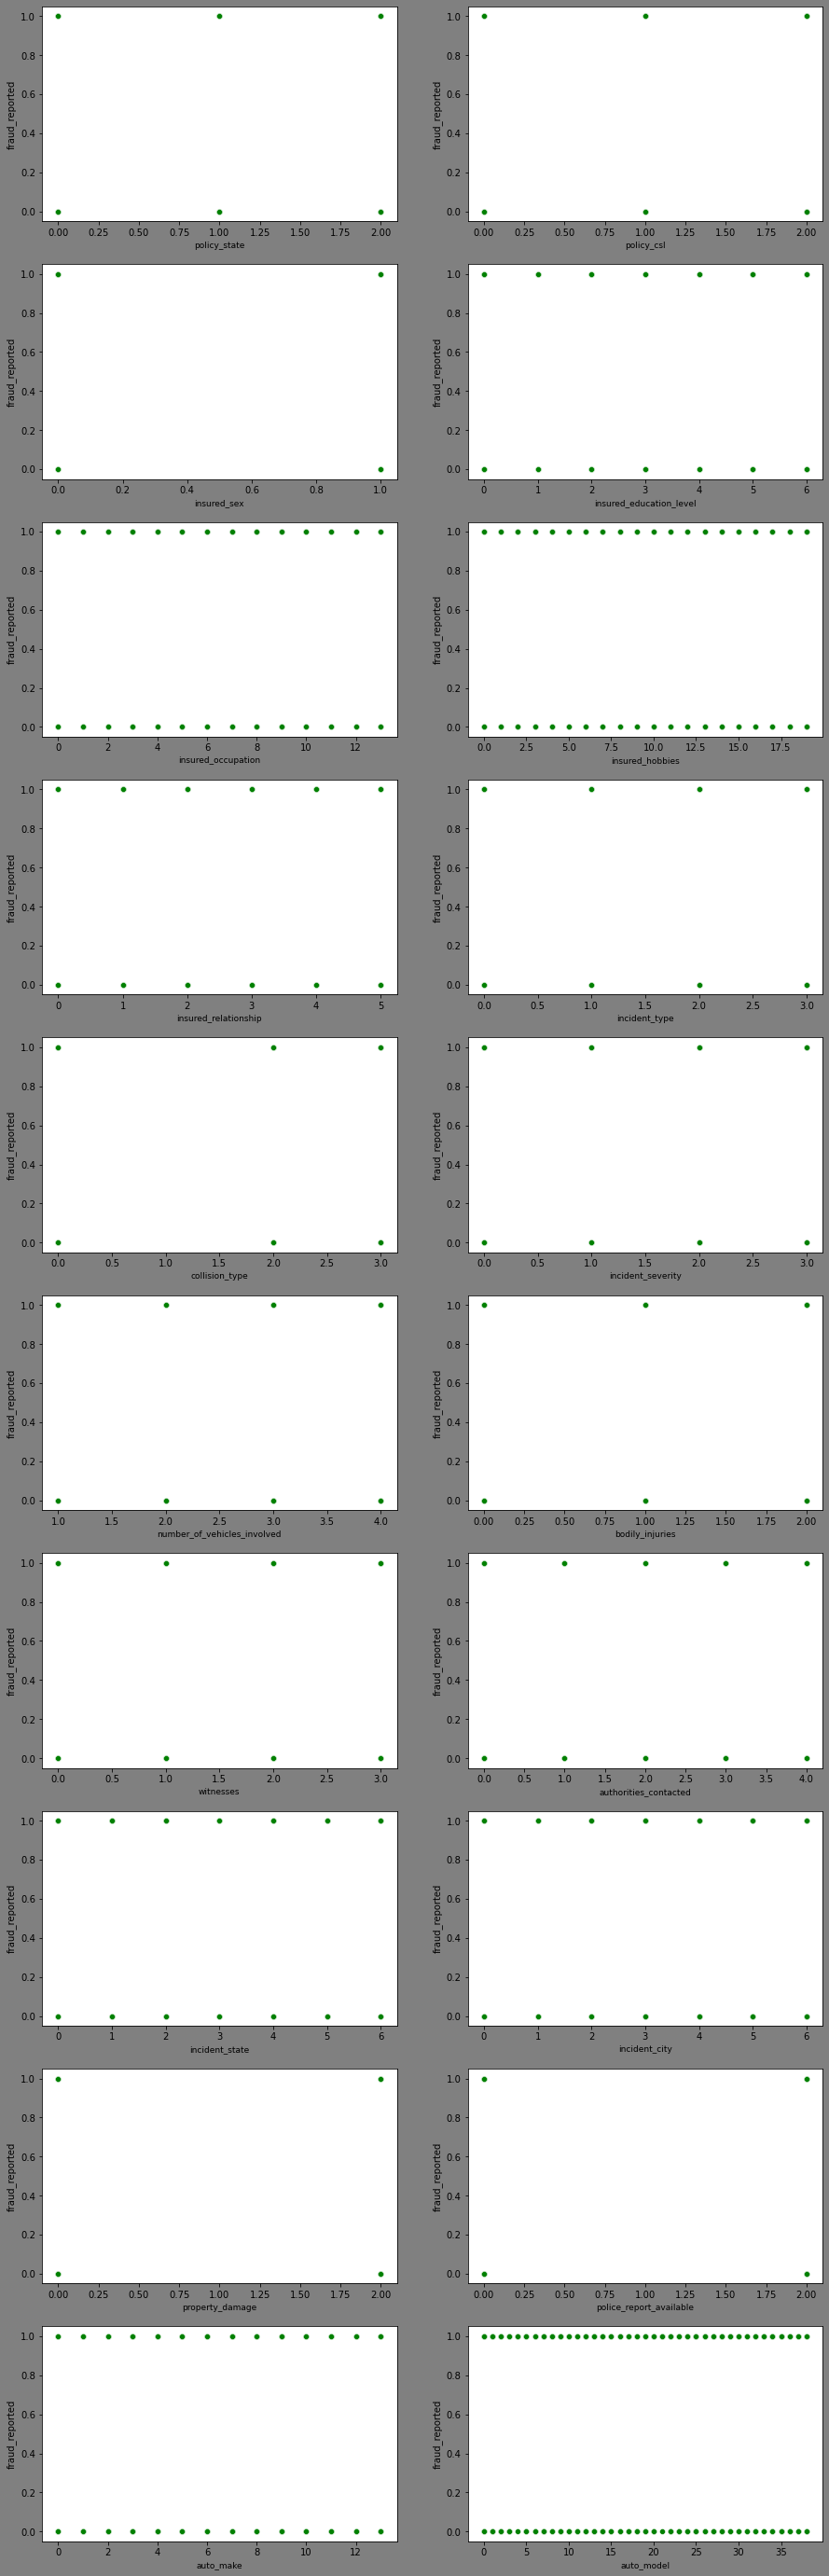

In [50]:
plt.figure(figsize=(15,50),facecolor='grey')
plotnumber = 1


for column in data_cat:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.scatterplot(data[column], data['fraud_reported'],color = 'green')
        plt.xlabel(column,fontsize=9)

    plotnumber+=1
plt.show()

In [51]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                          float64
policy_csl                            float64
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                           float64
insured_education_level               float64
insured_occupation                    float64
insured_hobbies                       float64
insured_relationship                  float64
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                         float64
collision_type                        float64
incident_severity                     float64
authorities_contacted                 float64
incident_state                    

In [52]:
data['policy_bind_Day'] = pd.to_datetime(data.policy_bind_date,format="%d/%m/%Y").dt.day
data['policy_bind_Month'] = pd.to_datetime(data.policy_bind_date,format="%d/%m/%Y").dt.month
data['policy_bind_Year'] = pd.to_datetime(data.policy_bind_date,format="%d/%m/%Y").dt.year
data = data.drop(columns = 'policy_bind_date', axis = 1)

In [53]:
data['incident_Day'] = pd.to_datetime(data.incident_date,format="%d/%m/%Y").dt.day
data['incident_Month'] = pd.to_datetime(data.incident_date,format="%d/%m/%Y").dt.month
data['incident_Year'] = pd.to_datetime(data.incident_date,format="%d/%m/%Y").dt.year
data = data.drop(columns = 'incident_date', axis = 1)

In [54]:
data.shape

(1000, 41)

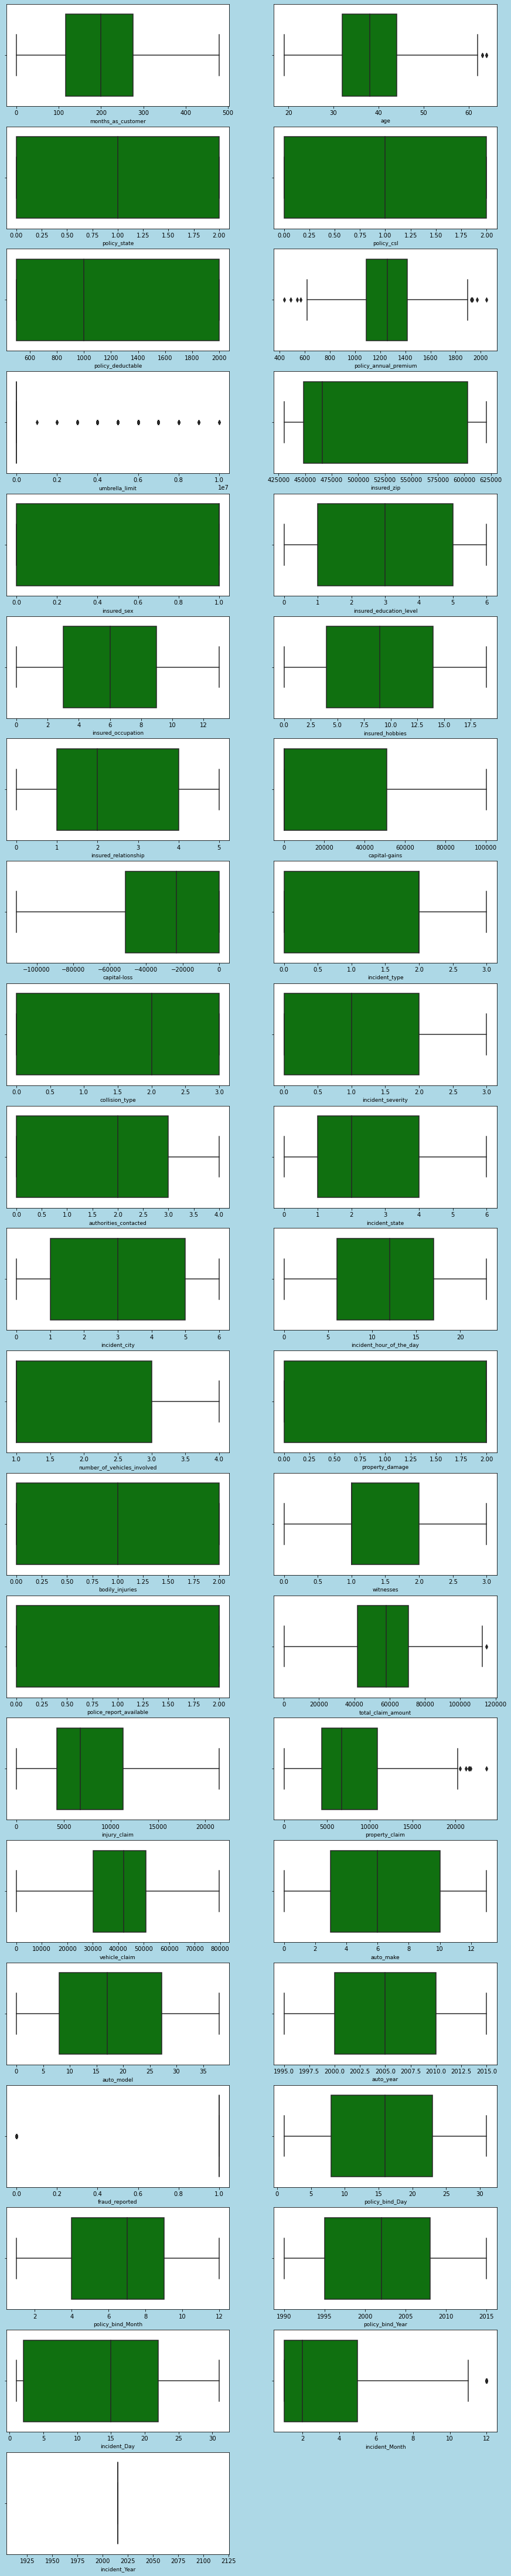

In [55]:
plt.figure(figsize=(15,80),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=42:
        ax=plt.subplot(21,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [56]:
# NOt mubh outliers. No need to treat.

## Feature Selection

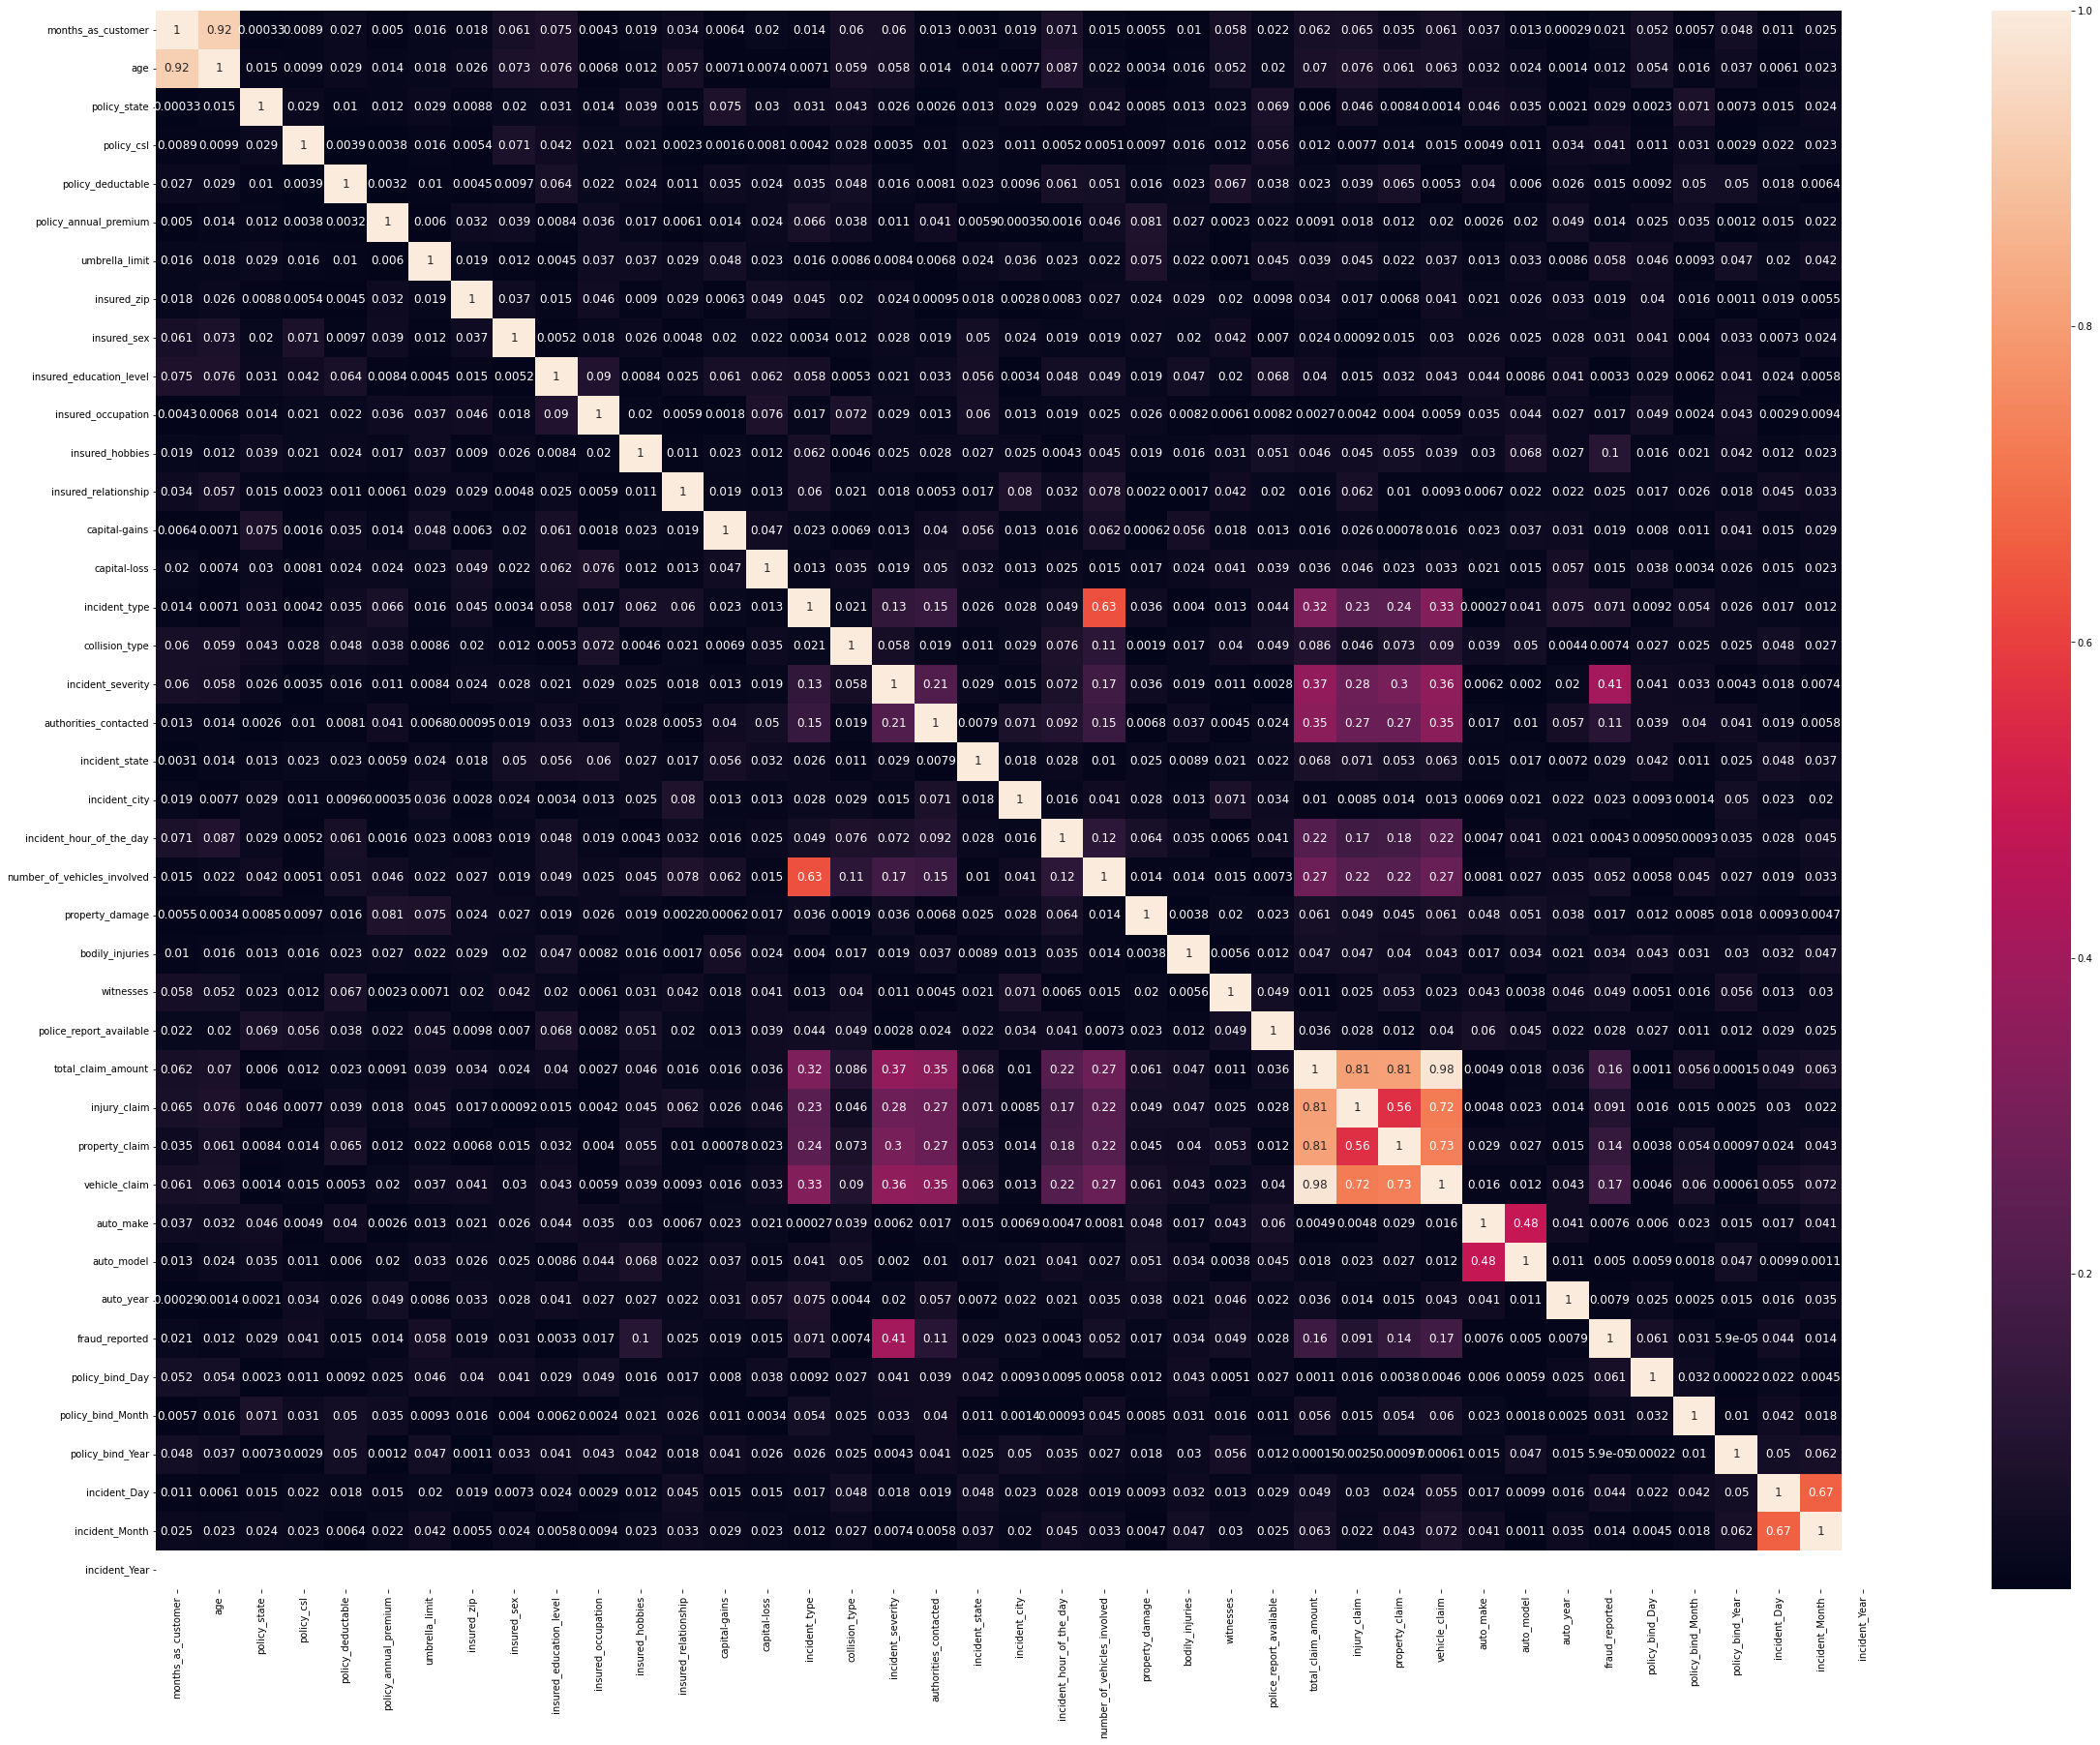

In [57]:
df_corr = data.corr().abs()

plt.figure(figsize =(40, 30))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :12})
plt.show()

<AxesSubplot:>

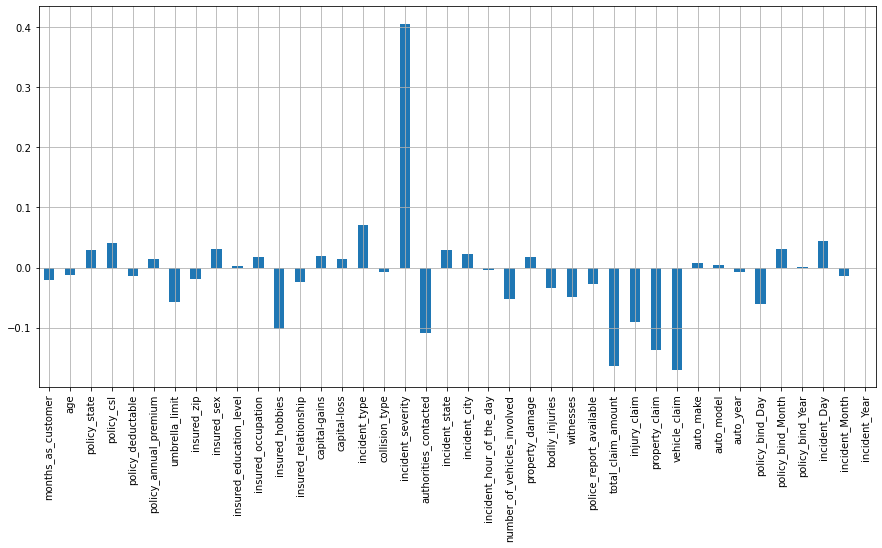

In [58]:
data.drop('fraud_reported',axis =1).corrwith(data.fraud_reported).plot(kind = 'bar', grid=True, figsize = (15,7))

In [59]:
#From the above two charts , dropping the corelated and less impact features
# dropping age, injury_claim, property_claim, incident_Year, policy_bind_Year, auto_make, auto_model,
# auto_year, incident_hour_of_the_day, collision_type, insured_education_level,total_claim_amount

In [60]:
data = data.drop(columns = ['age', 'injury_claim', 'property_claim', 'incident_Year', 'policy_bind_Year', 
                     'auto_make', 'auto_model', 'auto_year', 'incident_hour_of_the_day', 
                     'collision_type', 'total_claim_amount', 'insured_education_level'], axis =1)

In [61]:
data.shape

(1000, 29)

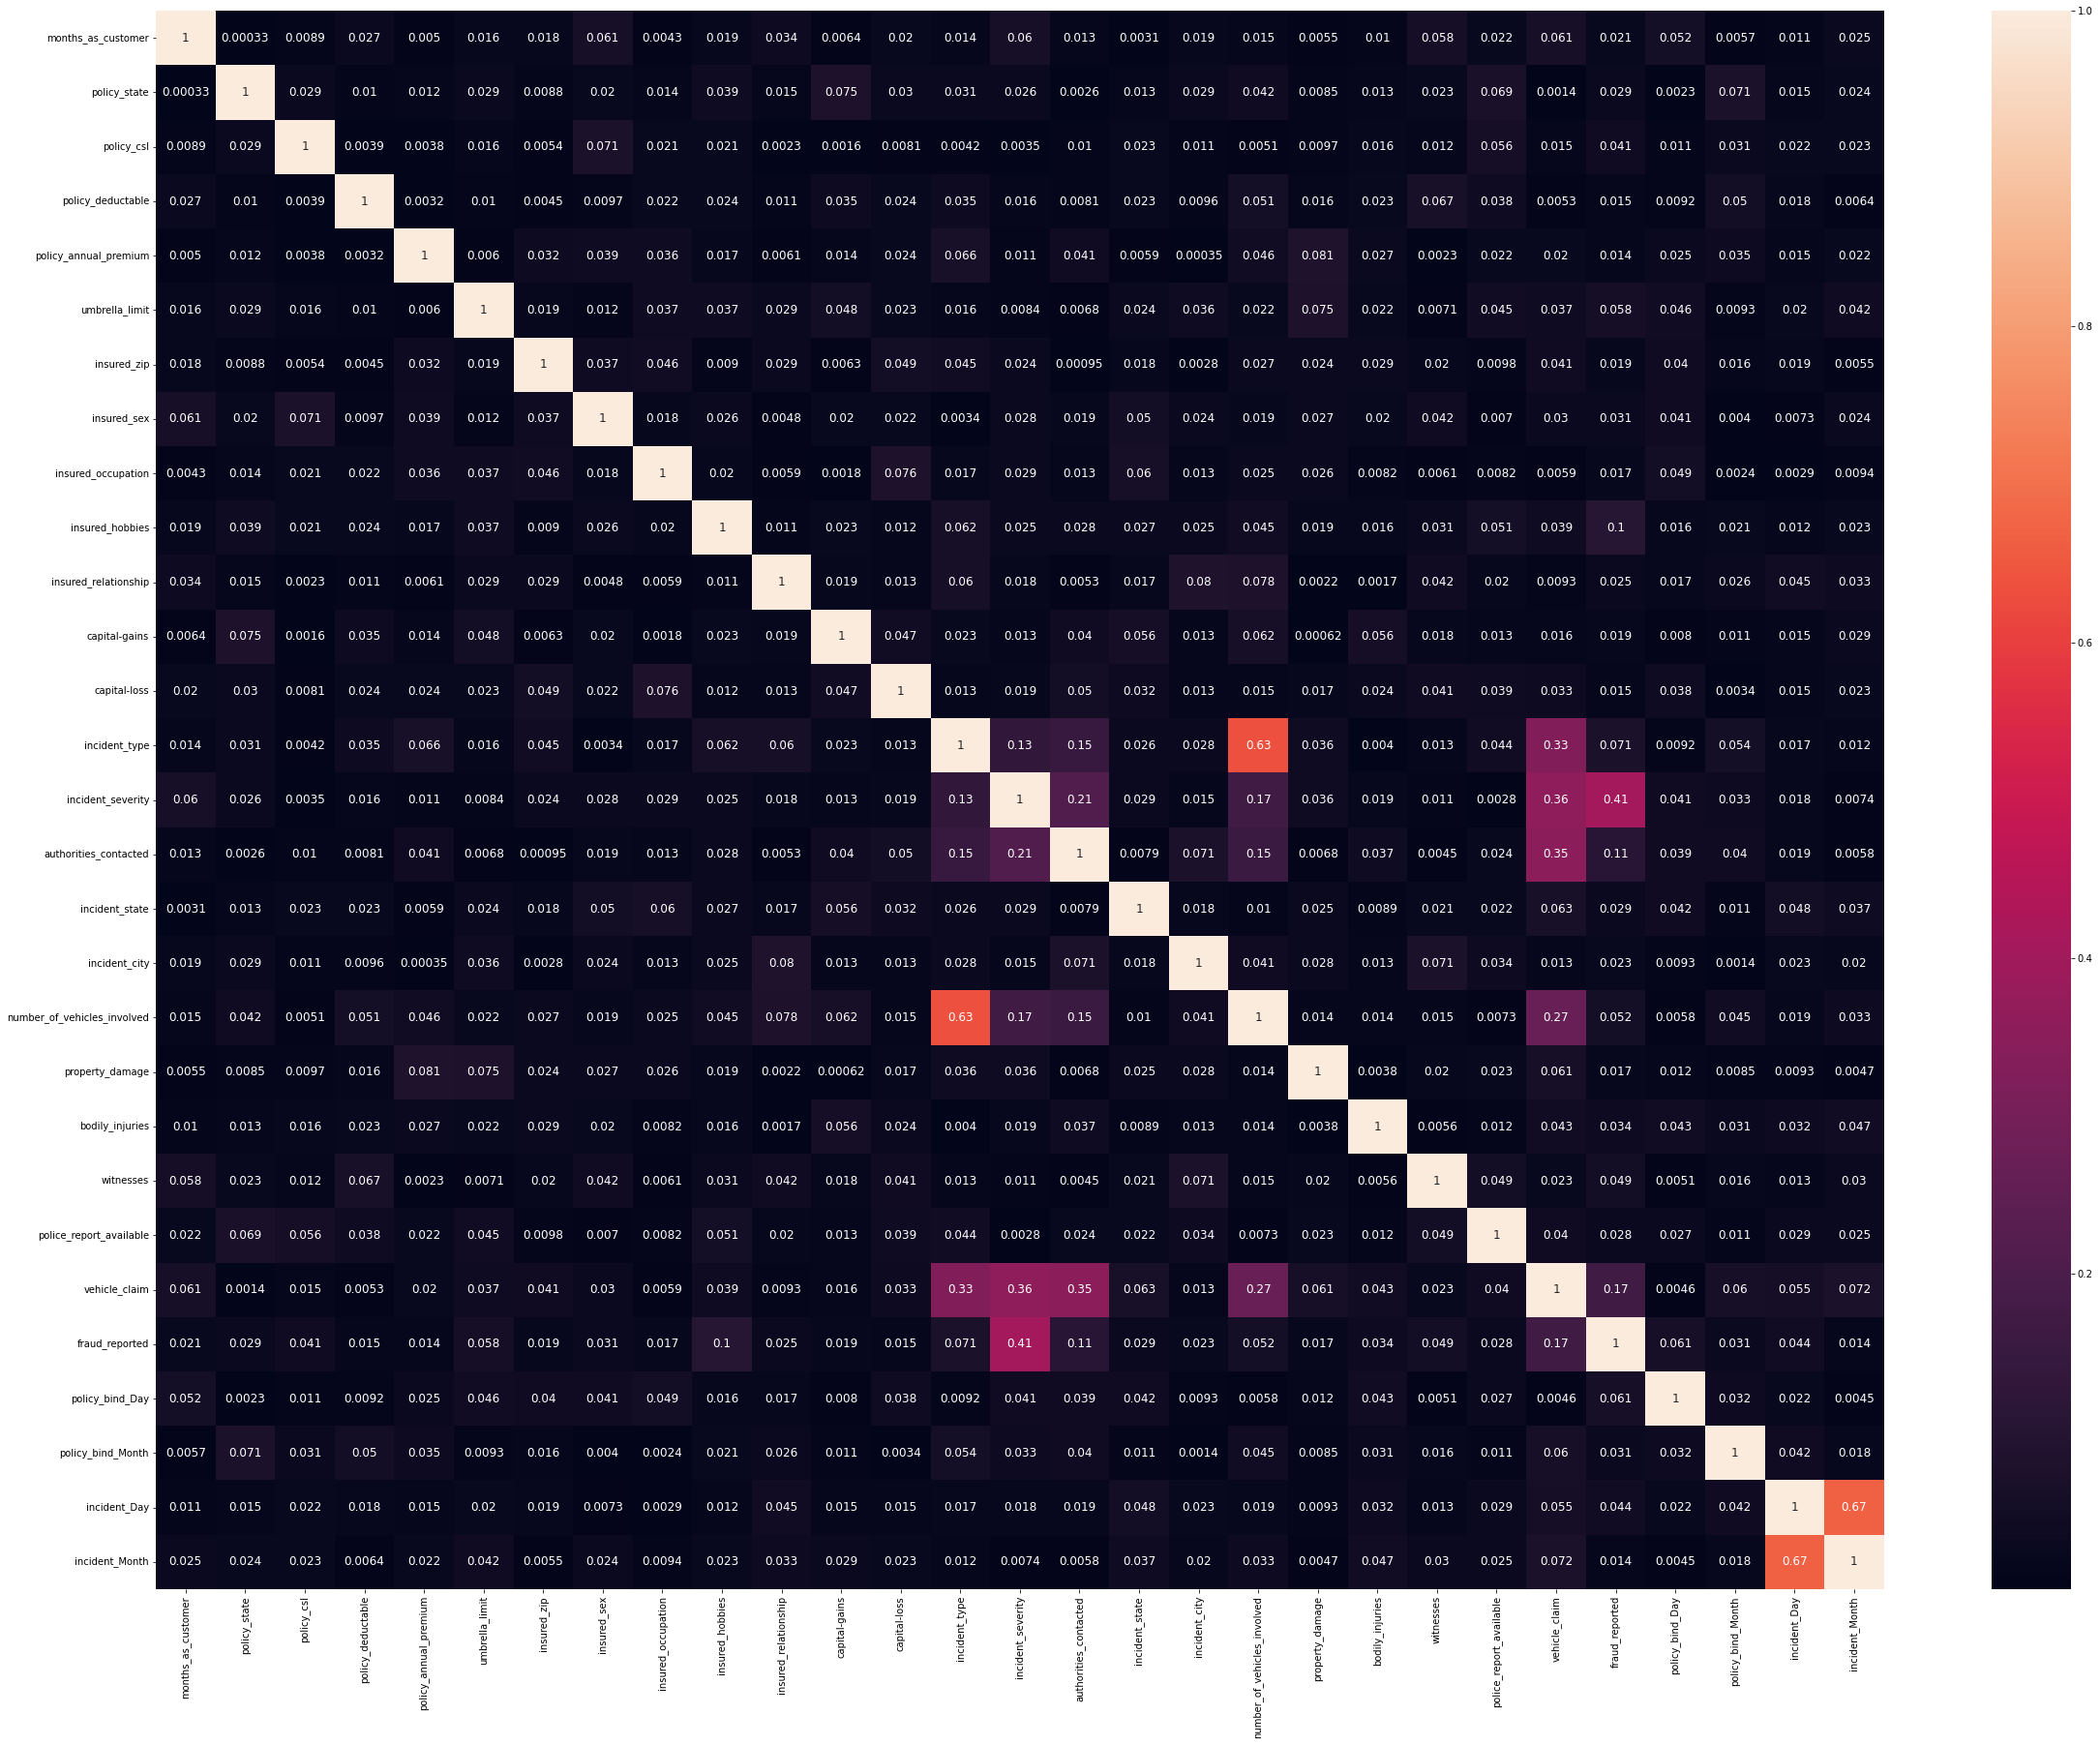

In [62]:
df_corr = data.corr().abs()

plt.figure(figsize =(40, 30))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :12})
plt.show()

In [63]:
# now, no feature not corelated more than 75%

In [64]:
data['fraud_reported'].value_counts()

1.0    753
0.0    247
Name: fraud_reported, dtype: int64

In [65]:
# Need to balance the data set

In [66]:
x = data.drop(columns = ['fraud_reported'],axis =1)
y = data.fraud_reported

In [67]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [68]:
balanced_x,balanced_y = smt.fit_resample(x, y)

In [69]:
balanced_x.shape, balanced_y.shape

((1506, 28), (1506,))

In [70]:
# Dataset has been balanced now

In [71]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
balanced_x_scaled = scale.fit_transform(balanced_x)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(balanced_x_scaled,i) for i in range(balanced_x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.022631,months_as_customer
1,1.035599,policy_state
2,1.021462,policy_csl
3,1.023992,policy_deductable
4,1.041660,policy_annual_premium
5,1.050898,umbrella_limit
6,1.040158,insured_zip
7,1.036856,insured_sex
8,1.034225,insured_occupation
9,1.039785,insured_hobbies


In [73]:
# all values are less than 5. SO there is no multicollinearity exists

## selection of Random state

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LogisticRegression

In [75]:
lg = LogisticRegression()

In [76]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(balanced_x_scaled,balanced_y,train_size = 0.75,random_state = i)
    lg.fit(x_train, y_train)
    predict_train = lg.predict(x_train)
    predict_test = lg.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.7980513728963685}
At random state 0, the test set accuracy is  {0.7453580901856764}
At random state 1, the train set accuracy is  {0.7945084145261293}
At random state 1, the test set accuracy is  {0.7639257294429708}
At random state 2, the train set accuracy is  {0.7883082373782108}
At random state 2, the test set accuracy is  {0.7798408488063661}
At random state 3, the train set accuracy is  {0.7883082373782108}
At random state 3, the test set accuracy is  {0.7771883289124668}
At random state 4, the train set accuracy is  {0.775022143489814}
At random state 4, the test set accuracy is  {0.7798408488063661}
At random state 5, the train set accuracy is  {0.79185119574845}
At random state 5, the test set accuracy is  {0.7798408488063661}
At random state 6, the train set accuracy is  {0.7794508414526129}
At random state 6, the test set accuracy is  {0.7931034482758621}
At random state 7, the train set accuracy is  {0.7927369353410098}
At ra

In [80]:
# at random state 71, the model perfroms well.So random state is 71
x_train,x_test,y_train,y_test = train_test_split(balanced_x,balanced_y,train_size = 0.75,random_state = 71)
lg.fit(x_train, y_train)
predict_train = lg.predict(x_train)
predict_test = lg.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {0.6014171833480957}
The test set accuracy is  {0.5490716180371353}


In [81]:
#Model
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [82]:
#logistic regression
metric_score(lg,x_train,x_test,y_train,y_test, train = True)
metric_score(lg,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 60.14171833480957 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.59      0.71      0.64       575
         1.0       0.62      0.49      0.55       554

    accuracy                           0.60      1129
   macro avg       0.60      0.60      0.60      1129
weighted avg       0.60      0.60      0.60      1129


===================Test Results============
Accuracy: 54.907161803713535 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.52      0.67      0.58       178
         1.0       0.60      0.44      0.51       199

    accuracy                           0.55       377
   macro avg       0.56      0.56      0.55       377
weighted avg       0.56      0.55      0.54       377



In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbr = GradientBoostingClassifier()

In [85]:
# Random Forest
metric_score(rf,x_train,x_test,y_train,y_test, train = True)
metric_score(rf,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       575
         1.0       1.00      1.00      1.00       554

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129


===================Test Results============
Accuracy: 88.3289124668435 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       178
         1.0       0.91      0.86      0.89       199

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377



In [86]:
# Decision Tree
metric_score(dt,x_train,x_test,y_train,y_test, train = True)
metric_score(dt,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       575
         1.0       1.00      1.00      1.00       554

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129


===================Test Results============
Accuracy: 78.24933687002653 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       178
         1.0       0.81      0.77      0.79       199

    accuracy                           0.78       377
   macro avg       0.78      0.78      0.78       377
weighted avg       0.78      0.78      0.78       377



In [87]:
#knn
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 77.67936226749336 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.73      0.90      0.80       575
         1.0       0.86      0.65      0.74       554

    accuracy                           0.78      1129
   macro avg       0.79      0.77      0.77      1129
weighted avg       0.79      0.78      0.77      1129


===================Test Results============
Accuracy: 63.395225464190986 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.58      0.80      0.67       178
         1.0       0.73      0.48      0.58       199

    accuracy                           0.63       377
   macro avg       0.66      0.64      0.63       377
weighted avg       0.66      0.63      0.63       377



In [88]:
# Gradient Boost 
metric_score(gbr,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 95.837023914969 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       575
         1.0       0.96      0.95      0.96       554

    accuracy                           0.96      1129
   macro avg       0.96      0.96      0.96      1129
weighted avg       0.96      0.96      0.96      1129


===================Test Results============
Accuracy: 90.18567639257294 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       178
         1.0       0.93      0.88      0.90       199

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377



## Cross Validation

In [89]:
from sklearn.model_selection import KFold,cross_val_score

In [90]:
cross_val_score(lg,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7709665353897603

In [91]:
cross_val_score(rf,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8653054938285185

In [92]:
cross_val_score(knn,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7065169083188488

In [93]:
cross_val_score(dt,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8294228949858089

In [94]:
cross_val_score(gbr,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8626718884072957

In [95]:
# Gradient Boost Decision Tree gives the high accuracy SO this model has been selected as final model

## Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
grid_param = {'max_depth' : range (4,15),
             'min_samples_split' : range (2,20,2),
             'learning_rate' : np.arange (0.1,0.9)}

In [99]:
grid = GridSearchCV(gbr, param_grid = grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 15),
                         'min_samples_split': range(2, 20, 2)})

In [100]:
best = grid.best_params_
best

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 2}

In [101]:
grid_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, min_samples_split= 2)

In [102]:
grid_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6)

In [103]:
metric_score(grid_model,x_train,x_test,y_train,y_test, train = True)
metric_score(grid_model,x_train,x_test,y_train,y_test, train = False)


===================Train Results============
Accuracy: 100.0 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       575
         1.0       1.00      1.00      1.00       554

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129


===================Test Results============
Accuracy: 88.59416445623343 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       178
         1.0       0.90      0.88      0.89       199

    accuracy                           0.89       377
   macro avg       0.89      0.89      0.89       377
weighted avg       0.89      0.89      0.89       377



In [104]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

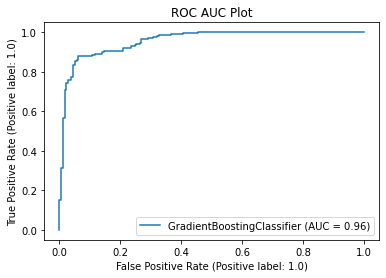

In [105]:
plot_roc_curve(grid_model,x_test,y_test)
plt.title('ROC AUC Plot')

In [ ]:
# ROC AUC curve is 96% acheived

## saving the model

In [106]:
filename = 'Insurance Claim_Fraud Detection'
pickle.dump(grid_model,open(filename,'wb'))

In [107]:
saved_mod = pickle.load(open(filename,'rb'))

In [108]:
saved_mod.predict(x_test)

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0.

In [109]:
y_test

207     1.0
642     1.0
856     1.0
1177    0.0
1170    0.0
       ... 
103     1.0
990     1.0
1316    0.0
977     0.0
1216    0.0
Name: fraud_reported, Length: 377, dtype: float64

In [110]:
#prediction is almost close to the actual

In [111]:
#End of Project